         Beverage_category       Beverage      Beverage_prep  Calories  \
0                   Coffee  Brewed Coffee              Short         3   
1                   Coffee  Brewed Coffee               Tall         4   
2                   Coffee  Brewed Coffee             Grande         5   
3                   Coffee  Brewed Coffee              Venti         5   
4  Classic Espresso Drinks    Caffè Latte  Short Nonfat Milk        70   

    Total Fat (g)  Trans Fat (g)   Saturated Fat (g)   Sodium (mg)  \
0             0.1             0.0                0.0             0   
1             0.1             0.0                0.0             0   
2             0.1             0.0                0.0             0   
3             0.1             0.0                0.0             0   
4             0.1             0.1                0.0             5   

    Total Carbohydrates (g)   Cholesterol (mg)   Dietary Fibre (g)  \
0                          5                 0                  

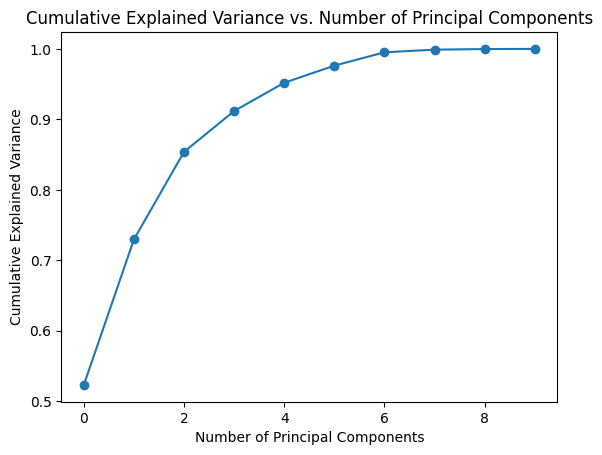

Number of components selected: 5
Explained variance ratio: 0.9520


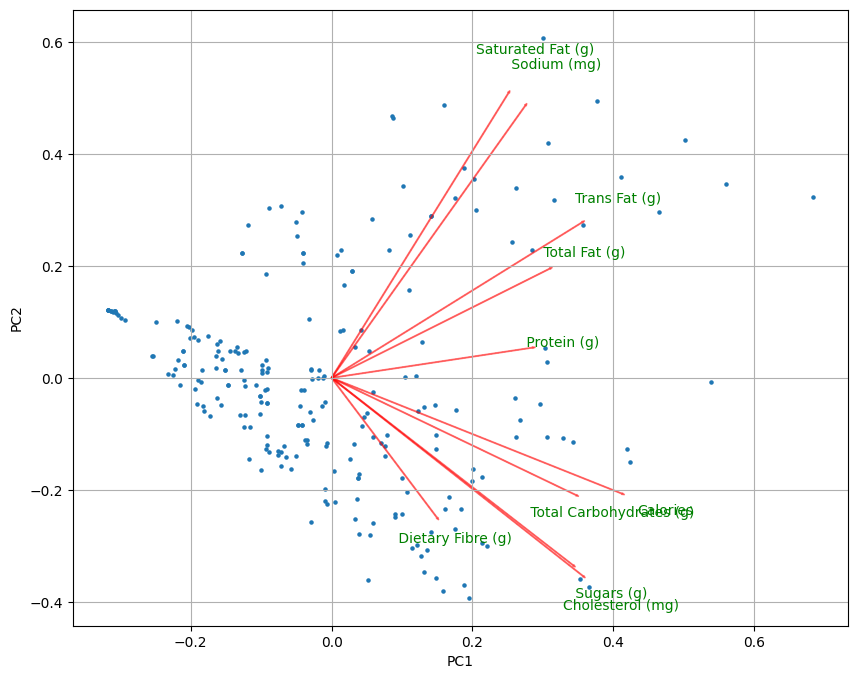

In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset

# Note: You need to download the dataset from Kaggle and load it into your local environment

# Assuming the dataset is named "starbucks.csv"
df = pd.read_csv("starbuck.csv")

# Display the first few rows of the dataset
print(df.head())

# Extract features (assuming all columns except the target variable)
X = X = df.drop(columns=['Beverage_category','Beverage','Beverage_prep','Vitamin A (% DV) ','Vitamin C (% DV)',' Calcium (% DV) ','Iron (% DV) ','Caffeine (mg)'])

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()




# Choose the number of components based on the plot or a desired explained variance threshold
# For example, to retain 95% of the variance, you can set n_components accordingly
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_std)


print(f"Number of components selected: {n_components}")
print(f"Explained variance ratio: {cumulative_variance_ratio[n_components - 1]:.4f}")
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='green', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='green', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

biplot(X_pca[:, 0:2], np.transpose(pca.components_[0:2, :]), labels=X.columns)
plt.show()

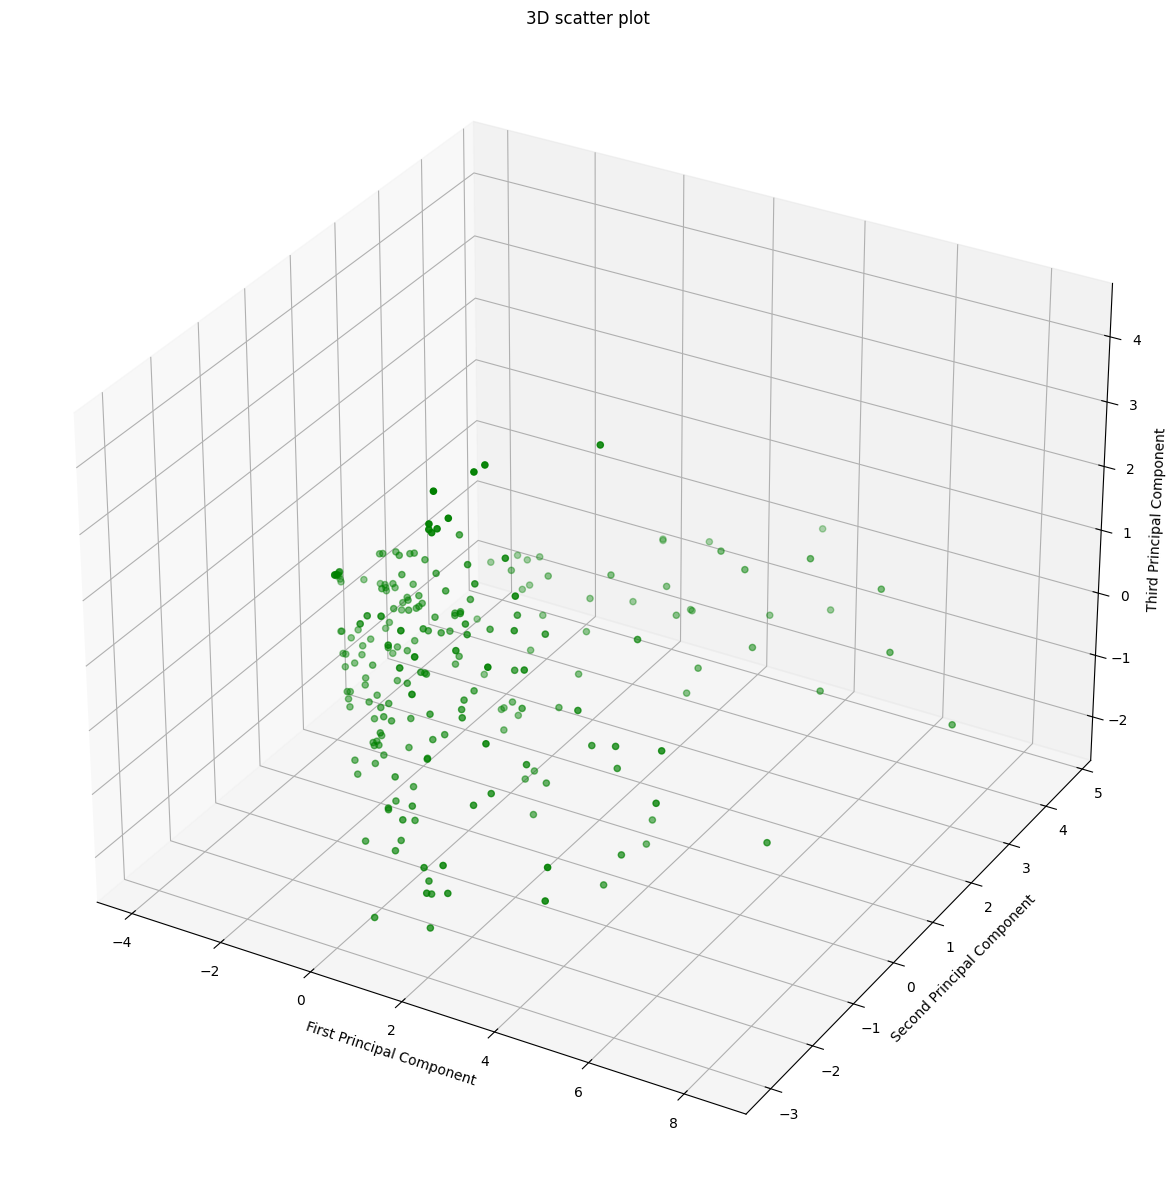

In [10]:
plt.figure(figsize=(15, 15))
ax = plt.axes(projection ="3d")

ax.scatter3D(X_pca[:,0], X_pca[:,1], X_pca[:,2], color = "green")
plt.title("3D scatter plot")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.show()